<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/22f_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Country/Region: 국가
    Province/State: 지방/주
    Lat: 지역의 위도
    Long: 지역의 경도
    날짜: 각 날짜의 확진자/사망자 수
    
- 데이터 출처: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university



## 목표
    - 계속 업데이트되는 라이브 데이터 분석
    - FBProphet을 이용해 시계열 데이터를 처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'mjkimcs'
os.environ['KAGGLE_KEY'] = '47adf959b8d9d52a7332fb2dff639854'

In [ ]:
!rm *.*
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/3.85M [00:00<?, ?B/s]
100% 3.85M/3.85M [00:00<00:00, 63.4MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


In [ ]:
df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('RAW_global_deaths.csv')

In [ ]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695


In [ ]:
df_death.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2339,2343,2346,2354,2363,2370,2373,2378,2385,2389,2389,2397,2399,2400,2400,2404,2405,2406,2407,2407,2408,2410,2413,2414,2418,2419,2424,2427,2427,2427,2428,2428,2430,2430,2430,2432,2433,2435,2436,2438
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1277,1281,1287,1291,1296,1303,1310,1315,1324,1332,1339,1350,1358,1369,1380,1393,1398,1404,1418,1433,1446,1460,1472,1488,1503,1517,1531,1543,1555,1567,1582,1600,1617,1636,1653,1666,1681,1696,1715,1736
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2836,2840,2843,2849,2853,2856,2861,2863,2866,2871,2877,2881,2884,2888,2891,2894,2898,2900,2904,2909,2909,2914,2918,2924,2926,2930,2932,2935,2939,2943,2945,2947,2950,2954,2958,2961,2964,2967,2970,2973
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91,91,92,92,93,93,96,96,97,97,98,100,100,101,101,101,102,103,103,104,105,106,106,106,106,106,106,107,107,107,107,107,107,107,107,107,109,110,110,110
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,436,439,442,444,448,452,457,459,461,462,462,464,464,464,466,466,468,470,473,474,475,475,475,478,487,487,490,491,492,493,494,496,498,498,498,499,499,500,501,502


In [ ]:
df_case['Country/Region'].value_counts()

China             33
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Singapore          1
Greece             1
Morocco            1
India              1
Paraguay           1
Name: Country/Region, Length: 192, dtype: int64

In [ ]:
df = df_case.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001,2050,2064,2091,2140,2142,2195,2228,2269,2311,2329,2347,2362,2368,2383,2392,2403,2412,2421
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601,163213,163975,164736,165535,166200,166800,167604,168444,169487,170527,171154,171717,172315,173635,174969,176377,177768,179293
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127,2131,2131,2133,2134,2136,2136,2145,2145,2148,2151,2154,2157,2157,2165,2176,2187,2221,2255


In [ ]:
# 데이터프레임 구조를 Date를 Index로, 지역을 Column으로 변경

def fix_dataframe(df):
  df = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
  df = df.transpose() # 행과 열 바꾸기
  df.index.name = 'Date'
  df.reset_index(inplace=True) # 인덱스인 Date를 열로 변환 (Date 내용을 수정하기 위한 기반)
  df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s))) # 일반적인 날짜형식으로 변환
  df.set_index('Date', inplace=True) # 열인 Date를 다시 인덱스로 변환
  return df

In [ ]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [ ]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,55604,100246,111917,10699,20519,598,2064334,170402,28930,445374,233129,8403,117809,543351,2772,278312,754473,12244,5434,866,242292,127537,26524,10168174,185,236666,11797,141750,2031,15048,568,33749,850737,5001,3849,799460,100758,2226262,3502,8625,...,436640,2401,3855,59869,292143,184767,18,6017,1503796,6583,3133122,79999,30128,8868,631166,547775,15179,942,13308,509,25504,103,6319,7680,228362,2638422,28134115,40213,1351190,370425,4127578,52815,79654,1,136068,2383,173635,2165,74503,35796
2021-02-22,55617,101285,112094,10712,20548,614,2069751,170506,28937,446644,233201,8471,118530,543717,2791,279456,755594,12255,5434,866,243176,128661,27721,10195160,185,238591,11847,141761,2034,15072,593,33749,854190,5001,3868,803009,100784,2229663,3518,8625,...,439596,2464,3857,59879,292792,185014,18,6246,1504588,6931,3153971,80517,30128,8869,631166,550224,15230,942,13308,509,25504,103,6348,7682,228937,2646526,28190159,40221,1354545,372530,4138237,53310,79681,1,136545,2392,174969,2176,75027,35862
2021-02-23,55646,102306,112279,10739,20584,636,2077228,170672,28939,448371,233424,8477,119205,544116,2852,280428,757696,12264,5434,867,244380,129176,27721,10257875,185,240391,11868,141783,2041,15089,633,33749,857403,5001,3882,805317,100807,2233589,3522,8625,...,442853,2514,3862,59883,294790,185916,18,6246,1505586,7098,3161432,81009,30205,8880,642099,551355,15282,942,13308,509,25692,107,6466,7686,229781,2655633,28261595,40243,1358871,375535,4146760,53973,79717,1,136986,2403,176377,2187,75582,35910


In [ ]:
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,2432,1666,2961,107,499,13,51198,3164,909,8386,3198,179,423,8349,31,1912,21903,314,70,1,11441,4979,254,246504,3,9854,139,3196,3,144,0,523,21675,63,134,20042,4833,58834,143,127,...,4337,10,79,29,6505,3776,0,202,49053,86,67101,445,1864,168,12649,9887,998,9,90,21,83,0,81,139,7793,28060,498897,333,26470,1125,120810,574,622,0,1316,35,1976,619,1020,1436
2021-02-22,2433,1681,2964,109,499,14,51359,3167,909,8397,3202,179,429,8356,31,1921,21923,314,70,1,11470,5016,300,247143,3,9933,139,3197,3,144,0,523,21720,63,135,20126,4833,58974,144,127,...,4351,11,79,29,6577,3784,0,208,49150,87,67636,450,1871,169,12649,9907,1001,9,90,21,83,0,81,139,7811,28138,500310,333,26531,1140,120988,583,622,0,1320,35,1986,619,1031,1441
2021-02-23,2435,1696,2967,110,500,14,51510,3171,909,8434,3204,179,433,8374,31,1930,21956,314,70,1,11508,5034,300,248529,3,9978,141,3197,3,144,0,523,21761,63,136,20151,4833,59118,144,127,...,4366,11,79,29,6671,3792,0,208,49413,87,68079,453,1876,170,12713,9930,1004,9,90,21,83,0,81,139,7843,28213,502660,333,26690,1145,121536,588,622,0,1325,35,1994,620,1040,1448


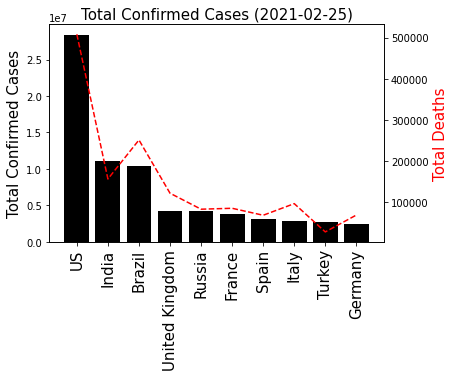

In [ ]:
# 나라별 누적 확진/사망자 수 시각화 (최신일자, 가장 많이 확진된 10국가)

top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black')
plt.xticks(rotation=90, size=15)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'), size=15)

ax = plt.gca()
ax2 = ax.twinx() # 동일한 x를 공유하지만 또다른 y축
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index] # 첫번째 그래프의 인덱스로 정렬
ax2.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)
plt.show()

In [ ]:
top_ten_cases

Country/Region
US                28411273
India             11063491
Brazil            10390461
United Kingdom     4166727
Russia             4164802
France             3746475
Spain              3180212
Italy              2868435
Turkey             2674766
Germany            2427069
Name: 2021-02-25 00:00:00, dtype: int64

In [ ]:
top_ten_cases.name

Timestamp('2021-02-25 00:00:00')

In [ ]:
# 나라별 시간에 따른 확진/사망자 수 시각화하기

def time_series(country):
  plt.plot(df_case.index, df_case[country], 'b-')
  plt.ylabel('Confirmed Cases', color='blue')
  plt.title(country + ' Cases & Deaths')
  plt.xlabel('Date')
  plt.xlim(right=df_case.index[-1])
  plt.ylim(0, df_case[country].max()*1.1)

  ax = plt.gca()
  ax2 = ax.twinx()
  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Deaths', color='red')
  ax2.set_ylim(0, df_death[country].max()*1.3)
  plt.show()

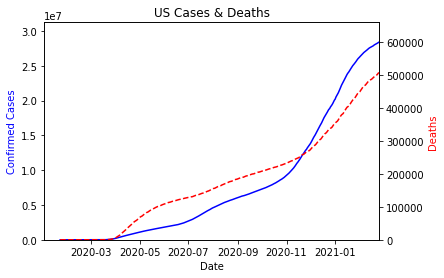

In [ ]:
time_series('US')

In [ ]:
for i in df_case.columns:
  print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Mal

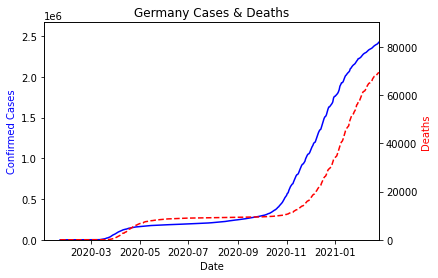

In [ ]:
time_series('Germany')

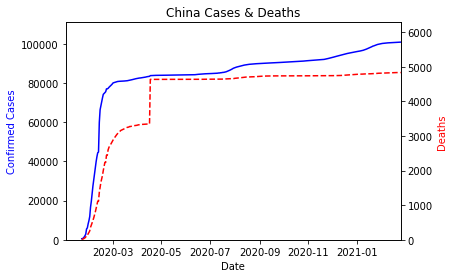

In [ ]:
time_series('China')

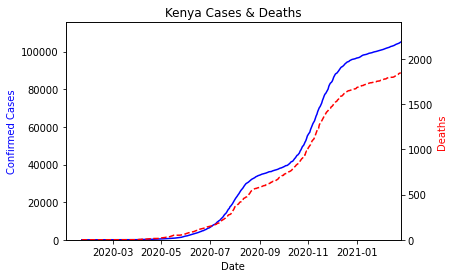

In [ ]:
time_series('Kenya')

In [ ]:
time_series('Kenya')

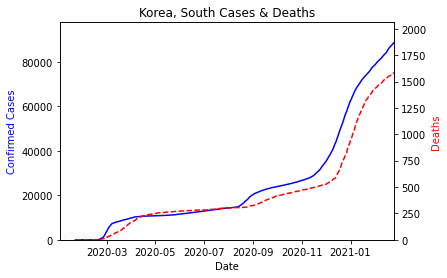

In [ ]:
# 한국의 누적 확진/사망자 수 시각화

time_series('Korea, South')

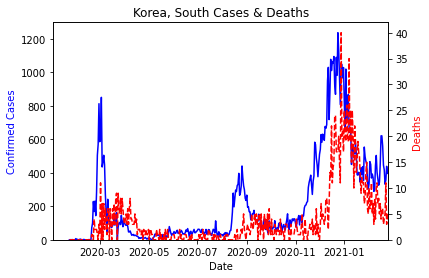

In [ ]:
# 한국 누적이 아닌 일일 확진/사망자 수 시각화 : diff() 이용

country = 'Korea, South'
plt.plot(df_case.index, df_case[country].diff(), 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(bottom=0)

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death[country].diff(), 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(bottom=0)
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
# 국가명을 국가코드로 변경

code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [ ]:
type(country_renamer)

dict

In [ ]:
code.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [ ]:
country_to_code = code.set_index('COUNTRY')['CODE']
country_to_code

COUNTRY
Afghanistan       AFG
Albania           ALB
Algeria           DZA
American Samoa    ASM
Andorra           AND
                 ... 
Virgin Islands    VGB
West Bank         WBG
Yemen             YEM
Zambia            ZMB
Zimbabwe          ZWE
Name: CODE, Length: 222, dtype: object

In [ ]:
type(country_to_code)

pandas.core.series.Series

In [ ]:
country_to_code.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Virgin Islands', 'West Bank', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='COUNTRY', length=222)

In [ ]:
df_rename = df_case.rename(country_renamer, axis=1).copy() # rename : 컬럼에 매핑
df_rename

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Republic of the",...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,United States,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,55604,100246,111917,10699,20519,598,2064334,170402,28930,445374,233129,8403,117809,543351,2772,278312,754473,12244,5434,866,242292,127537,26524,10168174,185,236666,11797,141750,2031,15048,568,33749,850737,5001,3849,799460,100758,2226262,3502,8625,...,436640,2401,3855,59869,292143,184767,18,6017,1503796,6583,3133122,79999,30128,8868,631166,547775,15179,942,13308,509,25504,103,6319,7680,228362,2638422,28134115,40213,1351190,370425,4127578,52815,79654,1,136068,2383,173635,2165,74503,35796
2021-02-22,55617,101285,112094,10712,20548,614,2069751,170506,28937,446644,233201,8471,118530,543717,2791,279456,755594,12255,5434,866,243176,128661,27721,10195160,185,238591,11847,141761,2034,15072,593,33749,854190,5001,3868,803009,100784,2229663,3518,8625,...,439596,2464,3857,59879,292792,185014,18,6246,1504588,6931,3153971,80517,30128,8869,631166,550224,15230,942,13308,509,25504,103,6348,7682,228937,2646526,28190159,40221,1354545,372530,4138237,53310,79681,1,136545,2392,174969,2176,75027,35862
2021-02-23,55646,102306,112279,10739,20584,636,2077228,170672,28939,448371,233424,8477,119205,544116,2852,280428,757696,12264,5434,867,244380,129176,27721,10257875,185,240391,11868,141783,2041,15089,633,33749,857403,5001,3882,805317,100807,2233589,3522,8625,...,442853,2514,3862,59883,294790,185916,18,6246,1505586,7098,3161432,81009,30205,8880,642099,551355,15282,942,13308,509,25692,107,6466,7686,229781,2655633,28261595,40243,1358871,375535,4146760,53973,79717,1,136986,2403,176377,2187,75582,35910


In [ ]:
for i in df_rename.columns:
  if i not in country_to_code.index:
    df_rename.drop(i, axis=1, inplace=True)

df_code = df_rename.rename(country_to_code, axis=1)
df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,AZE,BHM,BHR,BGD,BRB,BLR,BEL,BLZ,BEN,BTN,BOL,BIH,BWA,BRA,BRN,BGR,BFA,MMR,BDI,CPV,KHM,CMR,CAN,CAF,TCD,CHL,CHN,COL,COM,COG,...,SRB,SYC,SLE,SGP,SVK,SVN,SLB,SOM,ZAF,SSD,ESP,LKA,SDN,SUR,SWE,CHE,SYR,TWN,TJK,TZA,THA,TLS,TGO,TTO,TUN,TUR,USA,UGA,UKR,ARE,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-21,55604,100246,111917,10699,20519,598,2064334,170402,28930,445374,233129,8403,117809,543351,2772,278312,754473,12244,5434,866,242292,127537,26524,10168174,185,236666,11797,141750,2031,15048,568,33749,850737,5001,3849,799460,100758,2226262,3502,8625,...,436640,2401,3855,59869,292143,184767,18,6017,1503796,6583,3133122,79999,30128,8868,631166,547775,15179,942,13308,509,25504,103,6319,7680,228362,2638422,28134115,40213,1351190,370425,4127578,52815,79654,1,136068,2383,173635,2165,74503,35796
2021-02-22,55617,101285,112094,10712,20548,614,2069751,170506,28937,446644,233201,8471,118530,543717,2791,279456,755594,12255,5434,866,243176,128661,27721,10195160,185,238591,11847,141761,2034,15072,593,33749,854190,5001,3868,803009,100784,2229663,3518,8625,...,439596,2464,3857,59879,292792,185014,18,6246,1504588,6931,3153971,80517,30128,8869,631166,550224,15230,942,13308,509,25504,103,6348,7682,228937,2646526,28190159,40221,1354545,372530,4138237,53310,79681,1,136545,2392,174969,2176,75027,35862
2021-02-23,55646,102306,112279,10739,20584,636,2077228,170672,28939,448371,233424,8477,119205,544116,2852,280428,757696,12264,5434,867,244380,129176,27721,10257875,185,240391,11868,141783,2041,15089,633,33749,857403,5001,3882,805317,100807,2233589,3522,8625,...,442853,2514,3862,59883,294790,185916,18,6246,1505586,7098,3161432,81009,30205,8880,642099,551355,15282,942,13308,509,25692,107,6466,7686,229781,2655633,28261595,40243,1358871,375535,4146760,53973,79717,1,136986,2403,176377,2187,75582,35910


In [ ]:
for i in df_code.columns:
  print(i)

AFG
ALB
DZA
AND
AGO
ATG
ARG
ARM
AUS
AUT
AZE
BHM
BHR
BGD
BRB
BLR
BEL
BLZ
BEN
BTN
BOL
BIH
BWA
BRA
BRN
BGR
BFA
MMR
BDI
CPV
KHM
CMR
CAN
CAF
TCD
CHL
CHN
COL
COM
COG
COD
CRI
CIV
HRV
CUB
CYP
CZE
DNK
DJI
DMA
DOM
ECU
EGY
SLV
GNQ
ERI
EST
SWZ
ETH
FJI
FIN
FRA
GAB
GMB
GEO
DEU
GHA
GRC
GRD
GTM
GIN
GNB
GUY
HTI
HND
HUN
ISL
IND
IDN
IRN
IRQ
IRL
ISR
ITA
JAM
JPN
JOR
KAZ
KEN
KOR
KSV
KWT
KGZ
LAO
LVA
LBN
LSO
LBR
LBY
LIE
LTU
LUX
MDG
MWI
MYS
MDV
MLI
MLT
MHL
MRT
MUS
MEX
MDA
MCO
MNG
MNE
MAR
MOZ
NAM
NPL
NLD
NZL
NIC
NER
NGA
MKD
NOR
OMN
PAK
PAN
PNG
PRY
PER
PHL
POL
PRT
QAT
ROU
RUS
RWA
KNA
LCA
VCT
WSM
SMR
STP
SAU
SEN
SRB
SYC
SLE
SGP
SVK
SVN
SLB
SOM
ZAF
SSD
ESP
LKA
SDN
SUR
SWE
CHE
SYR
TWN
TJK
TZA
THA
TLS
TGO
TTO
TUN
TUR
USA
UGA
UKR
ARE
GBR
URY
UZB
VUT
VEN
VNM
WBG
YEM
ZMB
ZWE


In [ ]:
# Choropleth map
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map

def get_choropleth_data(date):
  data = go.Choropleth(
      locations = df_code.columns,
      z = df_code.loc[date],
      text = df_rename.columns,
      colorscale = 'Blues',
      autocolorscale=False,
      reversescale=True,
      marker_line_color='darkgray',
      marker_line_width=0.5,
      colorbar_tickprefix = '',
      colorbar_title = 'Confirmed Cases',
  )
  return data

In [ ]:
date = df_case.index[-1]
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
    title_text='Confirmed Cases in ' + str(date),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

## 모델 학습을 위한 데이터 전처리 

### FBProphet 학습을 위한 데이터프레임 생성

In [ ]:
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api

df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
396,2021-02-21,87324
397,2021-02-22,87681
398,2021-02-23,88120
399,2021-02-24,88516


In [ ]:
df_case.reset_index()[['Date', 'Korea, South']]

Country/Region,Date,"Korea, South"
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
396,2021-02-21,87324
397,2021-02-22,87681
398,2021-02-23,88120
399,2021-02-24,88516


In [ ]:
df_case.reset_index()[['Date', 'Korea, South']].to_numpy()

array([[Timestamp('2020-01-22 00:00:00'), 1],
       [Timestamp('2020-01-23 00:00:00'), 1],
       [Timestamp('2020-01-24 00:00:00'), 2],
       [Timestamp('2020-01-25 00:00:00'), 2],
       [Timestamp('2020-01-26 00:00:00'), 3],
       [Timestamp('2020-01-27 00:00:00'), 4],
       [Timestamp('2020-01-28 00:00:00'), 4],
       [Timestamp('2020-01-29 00:00:00'), 4],
       [Timestamp('2020-01-30 00:00:00'), 4],
       [Timestamp('2020-01-31 00:00:00'), 11],
       [Timestamp('2020-02-01 00:00:00'), 12],
       [Timestamp('2020-02-02 00:00:00'), 15],
       [Timestamp('2020-02-03 00:00:00'), 15],
       [Timestamp('2020-02-04 00:00:00'), 16],
       [Timestamp('2020-02-05 00:00:00'), 19],
       [Timestamp('2020-02-06 00:00:00'), 23],
       [Timestamp('2020-02-07 00:00:00'), 24],
       [Timestamp('2020-02-08 00:00:00'), 24],
       [Timestamp('2020-02-09 00:00:00'), 25],
       [Timestamp('2020-02-10 00:00:00'), 27],
       [Timestamp('2020-02-11 00:00:00'), 28],
       [Timestamp('202

In [ ]:
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
396,2021-02-21,87324
397,2021-02-22,87681
398,2021-02-23,88120
399,2021-02-24,88516


### 학습데이터와 테스트데이터 분리


In [ ]:
from math import floor

In [ ]:
def train_test_split_df(df, test_size):
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div + 1:]

In [ ]:
train_df, test_df = train_test_split_df(df, 0.1)

In [ ]:
train_df.tail()

,ds,y
356,2021-01-12,70212
357,2021-01-13,70728
358,2021-01-14,71241
359,2021-01-15,71820
360,2021-01-16,72340


In [ ]:
test_df.head()

,ds,y
361,2021-01-17,72729
362,2021-01-18,73115
363,2021-01-19,73518
364,2021-01-20,73918
365,2021-01-21,74262


## Prophet 모델 학습

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 학습 결과 시각화

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

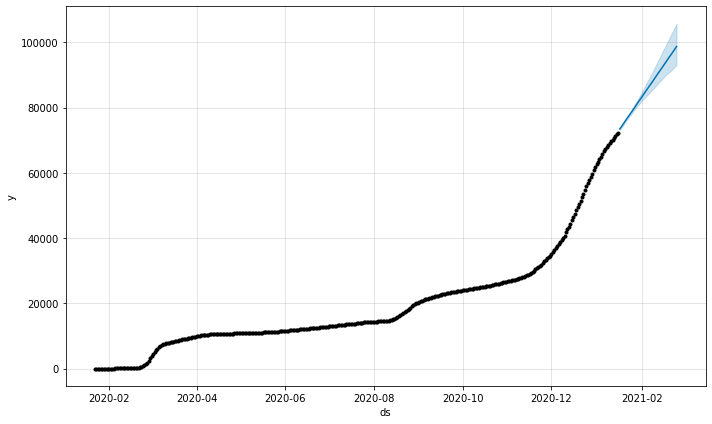

In [ ]:
pred = model.predict(test_df)
model.plot(pred);

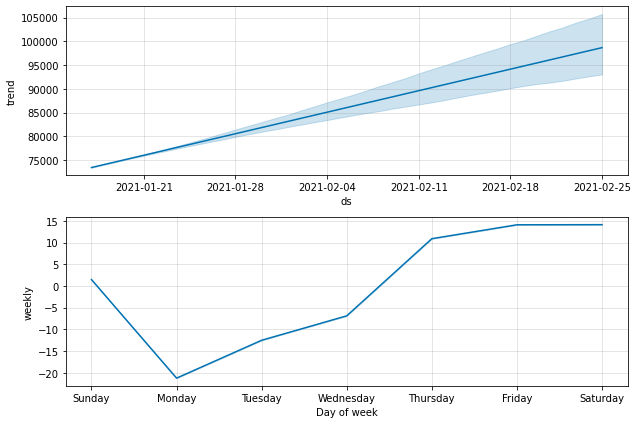

In [ ]:
model.plot_components(pred);

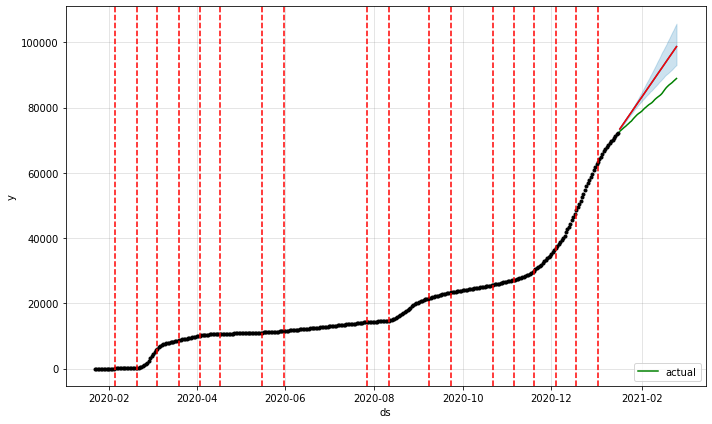

In [ ]:
f = model.plot(pred) # 예측선
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual') # 실제선
add_changepoints_to_plot(f.gca(), model, pred) # changepoints선
plt.legend(loc='lower right')
plt.show()

### 학습 결과 평가 : R2 Score
- 1에 가까울수록 예측력 높음  
- 음수로 갈수록 예측력 낮음

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-17,73451.801817,73154.988997,73715.536999,73451.801817,73451.801817,1.479926,1.479926,1.479926,1.479926,1.479926,1.479926,0.0,0.0,0.0,73453.281743
1,2021-01-18,74098.883385,73768.800878,74361.672363,74098.883385,74098.883385,-21.228812,-21.228812,-21.228812,-21.228812,-21.228812,-21.228812,0.0,0.0,0.0,74077.654573
2,2021-01-19,74745.964952,74425.958806,75046.718744,74737.709821,74746.171886,-12.506373,-12.506373,-12.506373,-12.506373,-12.506373,-12.506373,0.0,0.0,0.0,74733.458579
3,2021-01-20,75393.046519,75041.982181,75730.967044,75343.382518,75448.389045,-6.878016,-6.878016,-6.878016,-6.878016,-6.878016,-6.878016,0.0,0.0,0.0,75386.168503
4,2021-01-21,76040.128087,75705.008508,76403.252127,75933.392678,76140.583669,10.901599,10.901599,10.901599,10.901599,10.901599,10.901599,0.0,0.0,0.0,76051.029686


In [ ]:
test_df.head()

,ds,y
361,2021-01-17,72729
362,2021-01-18,73115
363,2021-01-19,73518
364,2021-01-20,73918
365,2021-01-21,74262


In [ ]:
print('R2 Score: ', r2_score(test_df['y'], pred['yhat']))

R2 Score:  -0.5630804724654241


### 미래 30일 예측하기

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


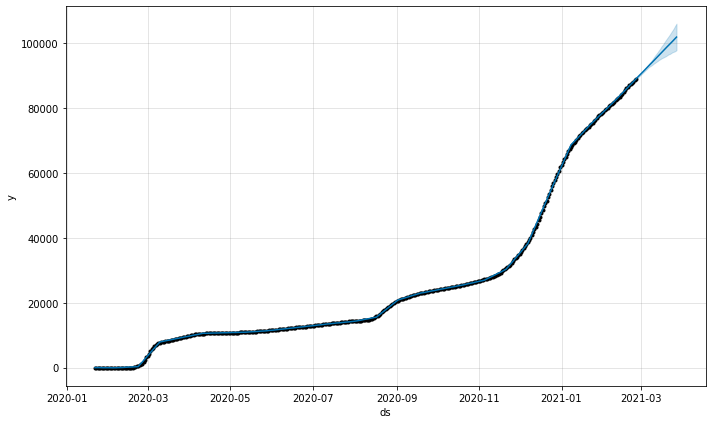

In [ ]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기

model = Prophet(changepoint_range=1.0)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


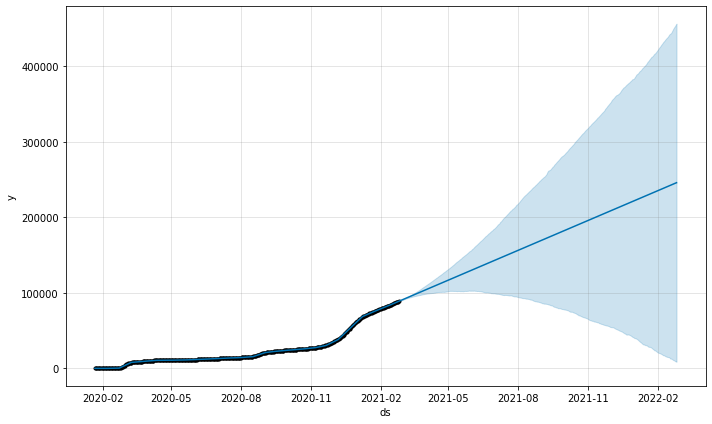

In [ ]:
model = Prophet(changepoint_range=1.0)
model.fit(df)
future = model.make_future_dataframe(365)
pred = model.predict(future)
model.plot(pred);

## IF-CASE 예측


### 한국 확진자 수 변화의 특별한 이벤트 확인하기


In [ ]:
df['ds'][10]

Timestamp('2020-02-01 00:00:00')

In [ ]:
df.loc[24:30]

,ds,y
24,2020-02-15,28
25,2020-02-16,29
26,2020-02-17,30
27,2020-02-18,31
28,2020-02-19,31
29,2020-02-20,104
30,2020-02-21,204


### 그 이벤트가 없었을 경우 한국의 확진자 수 변화 예측하기


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


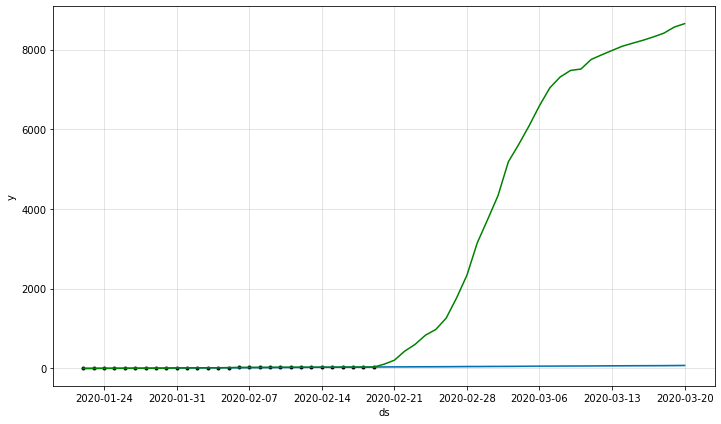

In [ ]:
# 확진자 수가 급증하기 전 데이터(20년2월19일까지)를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기

model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:28])

future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

plt.plot(df.loc[:58]['ds'], df.loc[:58]['y'], 'g-'); # 실제선